<a href="https://colab.research.google.com/github/ishahmshah1025/IEEE-HACKATHON-Data-Pioneers/blob/main/Pre_Owned_Car_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Libraries


Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
pd.read_csv("cardekho_dataset.csv")

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [40]:
cars = pd.read_csv("cardekho_dataset.csv")

# Understanding the Data


In [41]:
cars.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [42]:
print('The size of Dataframe is: ', cars.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
cars.info()
print('-'*100)

The size of Dataframe is:  (15411, 14)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats       

#Data Description
Feature Information

car_name: Car's Full name, which includes brand and specific model name.

brand: Brand Name of the particular car.

model: Exact model name of the car of a particular brand.

seller_type: Which Type of seller is selling the used car

fuel_type: Fuel used in the used car, which was put up on sale.

transmission_type: Transmission used in the used car, which was put on sale.

vehicle_age: The count of years since car was bought.

mileage: It is the number of kilometer the car runs per litre.

engine: It is the engine capacity in cc

max_power: Max power it produces in BHP.

seats: Total number of seats in car.

selling_price: The sale price which was put up on website.

#Cleaning the Dataset

In [43]:
cars.duplicated().sum()

0

there are no duplicate values in the dataset

In [44]:
cars.isnull().sum()


Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

there are no null values in the dataset

# Statistics of Data

In [45]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
cars.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [46]:
print('-'*50)
print('Top 10 Sold Cars on CarDekho Website')
print('-'*50)

cars.car_name.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars on CarDekho Website
--------------------------------------------------


car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

<ipython-input-47-b61c034fb6a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="car_name", data=cars,ec = "black",palette="Set1",order = cars['car_name'].value_counts().index)


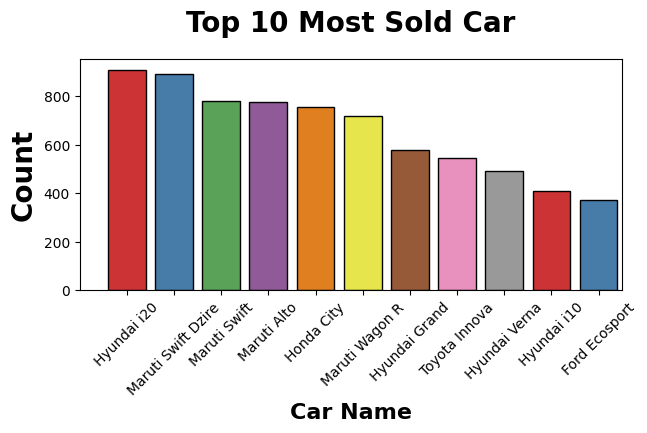

In [47]:
plt.subplots(figsize=(7,3))
sns.countplot(x="car_name", data=cars,ec = "black",palette="Set1",order = cars['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

# Feature Engineering

In [48]:
cars.drop(labels=['car_name','Unnamed: 0','max_power'],axis=1,inplace=True)

cars

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,5,570000
...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,5,250000
15407,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,7,925000
15408,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,5,425000
15409,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,7,1225000


These features are not directly correlated with the price of car and they can actually introduce noise into the model.
By dropping the car_name ,unnamed, max_power we can create a model that is more accurate and reliable.

In [49]:
cars.describe(include='all')

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,seats,selling_price
count,15411,15411,15411.000000,1.541100e+04,15411,15411,15411,15411.000000,15411.000000,15411.000000,1.541100e+04
unique,32,120,NaN,NaN,3,5,2,NaN,NaN,NaN,NaN
top,Maruti,i20,NaN,NaN,Dealer,Petrol,Manual,NaN,NaN,NaN,NaN
freq,4992,906,NaN,NaN,9539,7643,12225,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.036338,5.561648e+04,NaN,NaN,NaN,19.701151,1486.057751,5.325482,7.749711e+05
std,NaN,NaN,3.013291,5.161855e+04,NaN,NaN,NaN,4.171265,521.106696,0.807628,8.941284e+05
min,NaN,NaN,0.000000,1.000000e+02,NaN,NaN,NaN,4.000000,793.000000,0.000000,4.000000e+04
25%,NaN,NaN,4.000000,3.000000e+04,NaN,NaN,NaN,17.000000,1197.000000,5.000000,3.850000e+05
50%,NaN,NaN,6.000000,5.000000e+04,NaN,NaN,NaN,19.670000,1248.000000,5.000000,5.560000e+05
75%,NaN,NaN,8.000000,7.000000e+04,NaN,NaN,NaN,22.700000,1582.000000,5.000000,8.250000e+05


In [50]:
cars.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,5,570000


#Dealing With Outliers

<ipython-input-51-933f7b9fc151>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['selling_price']);


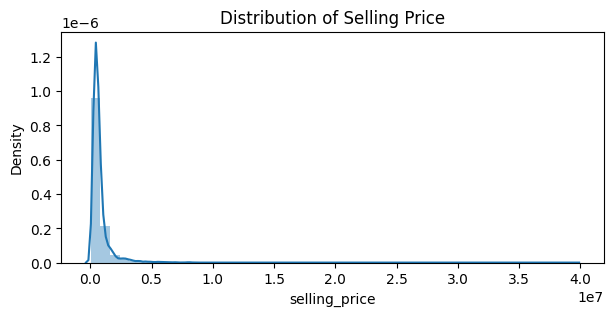

In [51]:
plt.figure(figsize = (7, 3))
sns.distplot(cars['selling_price']);
plt.title('Distribution of Selling Price');

We can see that there are some outliers in the dataset

First we take the value under which 99% of the data falls

In [52]:
p = cars['selling_price'].quantile(0.99)
print(p)

4544999.999999981


We will remove the rows which dont fall under this value

In [53]:
cars = cars[cars['selling_price']<p]
cars.describe()

,vehicle_age,km_driven,mileage,engine,seats,selling_price
count,15256.000000,1.525600e+04,15256.000000,15256.000000,15256.000000,1.525600e+04
mean,6.059911,5.594100e+04,19.750309,1472.513634,5.327543,7.167175e+05
std,3.013411,5.174314e+04,4.146151,499.027416,0.805515,5.940628e+05
min,0.000000,1.000000e+02,7.500000,793.000000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,5.000000,3.800000e+05
50%,6.000000,5.000000e+04,19.700000,1248.000000,5.000000,5.500000e+05
75%,8.000000,7.031575e+04,22.700000,1582.000000,5.000000,8.000000e+05
max,29.000000,3.800000e+06,33.540000,5461.000000,9.000000,4.500000e+06


<ipython-input-54-933f7b9fc151>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['selling_price']);


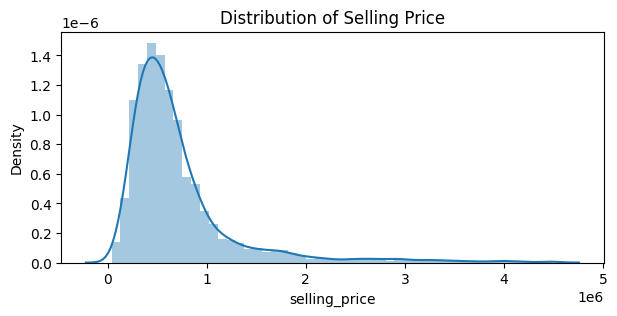

In [54]:
plt.figure(figsize = (7, 3))
sns.distplot(cars['selling_price']);
plt.title('Distribution of Selling Price');

<ipython-input-55-f3c253c4c70a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['mileage']);


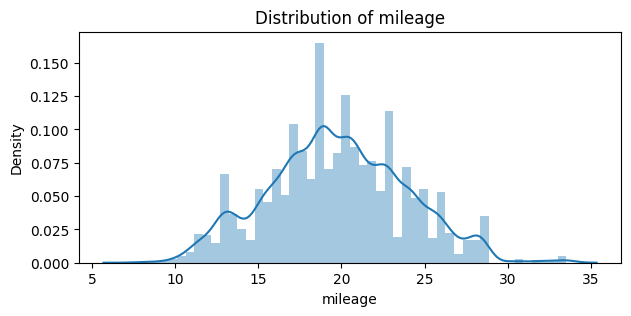

In [55]:
plt.figure(figsize = (7, 3))
sns.distplot(cars['mileage']);
plt.title('Distribution of mileage');

<ipython-input-56-c499622674ea>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['mileage']);


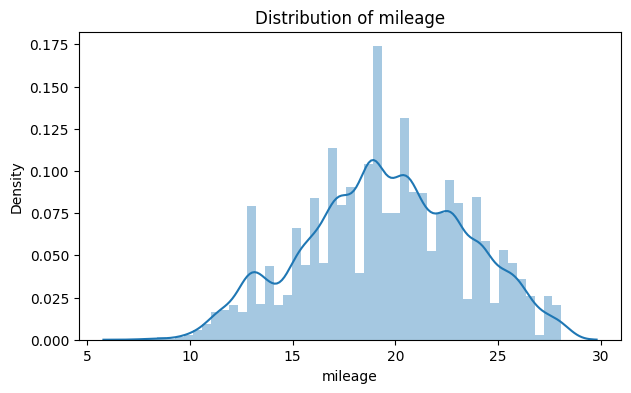

In [56]:
p = cars['mileage'].quantile(0.99)
cars = cars[cars['mileage']<p]
plt.figure(figsize = (7, 4))
sns.distplot(cars['mileage']);
plt.title('Distribution of mileage');

In [57]:
p = cars['km_driven'].quantile(0.99)
cars = cars[cars['km_driven']<p]
p = cars['engine'].quantile(0.99)
cars = cars[cars['engine']<p]
p = cars['vehicle_age'].quantile(0.99)
cars = cars[cars['vehicle_age']<p]

inference : we dealt with all the outliers that could affect model accuracy

# Encoding
Converting Categorical Columns into numerical

In [58]:
brand_dic = dict()
model_dic = dict()
seller_type_dic = dict()
transmission_dic = dict()
fuel_dic = dict()

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cars['brand_encoded'] = le.fit_transform(cars['brand'])
for num, brand in enumerate(le.classes_):
    brand_dic[brand] = num

cars['model_encoded'] = le.fit_transform(cars['model'])
for num, model in enumerate(le.classes_):
    model_dic[model] = num

cars['seller_type_encoded'] = le.fit_transform(cars['seller_type'])
for num, seller_type in enumerate(le.classes_):
    seller_type_dic[seller_type] = num

cars['transmission_type_encoded'] = le.fit_transform(cars['transmission_type'])
for num, transmission in enumerate(le.classes_):
    transmission_dic[transmission] = num

cars['fuel_type_encoded'] = le.fit_transform(cars['fuel_type'])
for num, fuel in enumerate(le.classes_):
    fuel_dic[fuel] = num


cars_new = cars.drop(['brand','model','seller_type','transmission_type','fuel_type'],axis=1)
cars_new.head()

,vehicle_age,km_driven,mileage,engine,seats,selling_price,brand_encoded,model_encoded,seller_type_encoded,transmission_type_encoded,fuel_type_encoded
0,9,120000,19.70,796,5,120000,15,6,1,1,4
1,5,20000,18.90,1197,5,550000,6,47,1,1,4
2,11,60000,17.00,1197,5,215000,6,102,1,1,4
3,9,37000,20.92,998,5,226000,15,6,1,1,4
4,6,30000,22.77,1498,5,570000,4,35,0,1,1


In [60]:
X = cars_new.drop(['selling_price'],axis=1)
y = cars_new['selling_price']

# Random Forest Regressor

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

In [63]:
y_pred = regressor.predict(X_test)

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9275751863159549

In [65]:
df_eval = pd.DataFrame(regressor.predict(X_test), columns=['predicted_price'])
y_test = y_test.reset_index(drop=True)
df_eval['actual_price'] = y_test
df_eval['Residual'] = df_eval['actual_price'] - df_eval['predicted_price']
df_eval['Difference%'] = np.absolute(df_eval['Residual']/df_eval['actual_price'])*100
df_eval

,predicted_price,actual_price,Residual,Difference%
0,3.495600e+05,355000,5440.000000,1.532394
1,1.254013e+06,940000,-314013.333333,33.405674
2,2.895600e+05,335000,45440.000000,13.564179
3,9.671200e+05,1025000,57880.000000,5.646829
4,3.705600e+05,385000,14440.000000,3.750649
...,...,...,...,...
2875,1.664000e+05,180000,13600.000000,7.555556
2876,6.873389e+05,600000,-87338.857143,14.556476
2877,1.677400e+06,1750000,72600.000000,4.148571
2878,1.375793e+06,1465000,89206.666667,6.089192


In [66]:
mean_absolute_error(y_test, y_pred)

87246.66209350064

In [67]:
mean = cars_new['selling_price'].mean()
mean
percentage = mean_absolute_error(y_test, y_pred)/mean*100
percentage

12.398213819680818

In [68]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)


87246.66209350064

generating pickle file to save trained model

In [69]:
import pickle

In [70]:
with open('model.pkl', 'wb') as file:
    pickle.dump(regressor, file)
